In [10]:
import sys
import os
IMATOOLS_DIR = os.getcwd()+'/..'
sys.path.insert(1, IMATOOLS_DIR) 

from imatools.common import ioutils as iou
from imatools.common import vtktools as vtku

import pandas as pd 
import numpy as np


In [11]:
from imatools.common import ioutils as iou 

# Locations of hard drive based on platform
dirdic={'macOS'   : '/Volumes/sandisk', 
        'Linux'   : '/media/jsl19/sandisk' , 
        'Windows' : 'D:/'}

p2f = iou.fullfile(dirdic[iou.chooseplatform()], '09-dnav_vs_inav/umc')
name = 'spatial_correspondence.csv'

df = pd.read_csv(iou.fullfile(p2f, 'local',name), skipinitialspace=True)
df_stats = pd.read_csv(iou.fullfile(p2f, 'results_local', 'stats.csv'), skipinitialspace=True)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


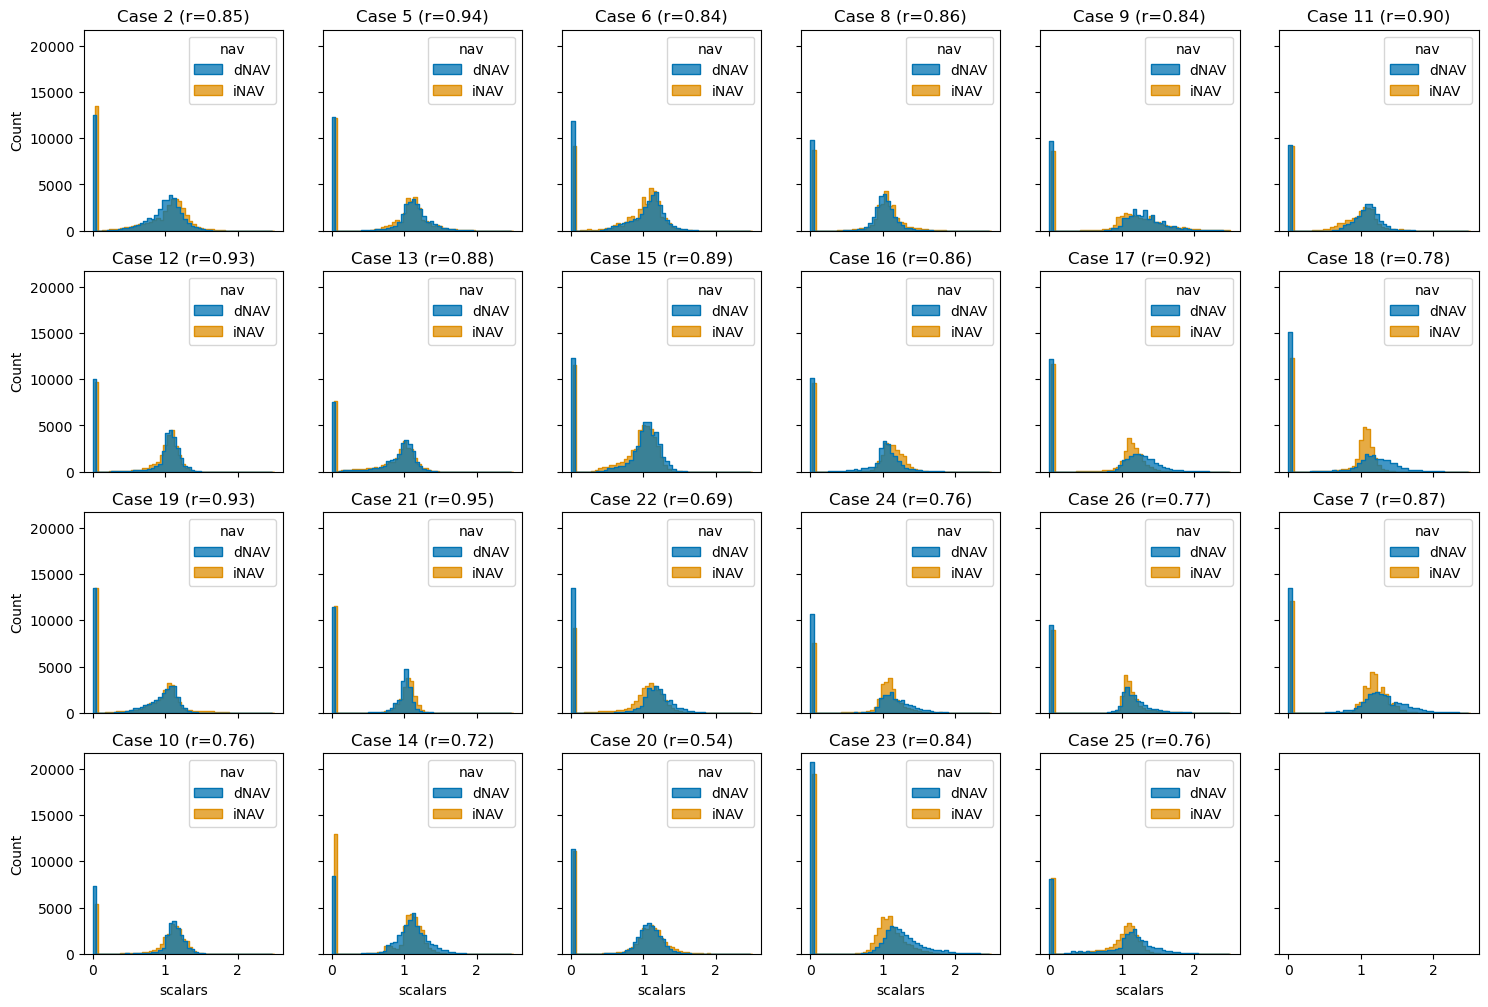

In [72]:
import matplotlib.pyplot as plt 
import seaborn as sns 
import scipy.stats as sstat

def get_data_from_vtk_path(path) : 
    msh = vtku.readVtk(path)
    dat = vtku.convertCellDataToNpArray(msh, 'scalars')
    return dat 

CX = ['2', '5', '6', '8', '9', '11', '12', '13', '15', '16', '17', '18', '19', '21', '22', '24', '26', '7', '10', '14', '20', '23', '25']

xnav = lambda x : 'LGE_{}NAV'.format(x)
dname = 'Normalised_IIR_MaxScar-single-voxel.vtk'
iname = 'Scalars_i_on_d.vtk'

# cx = 0
fig, ax = plt.subplots(4, 6, sharex=True, sharey=True,squeeze=True)
fig.set_figwidth(18)
fig.set_figheight(12)

sns.set_palette('colorblind')

corrs = np.zeros(len(CX))

for cx in range(len(CX)) : 
    ddat = get_data_from_vtk_path(iou.fullfile(p2f, 'local', CX[cx], xnav('d'), 'OUTPUT', dname))
    idat = get_data_from_vtk_path(iou.fullfile(p2f, 'local', CX[cx], iname))

    df_test = pd.DataFrame({
        'scalars': ddat.tolist() + idat.tolist(), 
        'nav': ['dNAV'] * len(ddat) + ['iNAV']*len(idat)
        })

    subs = np.unravel_index(cx, (4,6))
    corrs[cx] = sstat.pearsonr(ddat, idat).statistic

    ax[subs].set_title('Case {} (r={:.2f})'.format(CX[cx], corrs[cx]))
    sns.histplot(ax=ax[subs], data=df_test, x='scalars', hue='nav', 
                element='step', bins=50, multiple='dodge', stat='count', 
                binrange=(0, 2.5))


plt.savefig(iou.fullfile(iou.fullfile(p2f, 'local', 'scalar_comparison.eps')))



Ttest_1sampResult(statistic=1.8542256168160807, pvalue=0.07716209167242834)


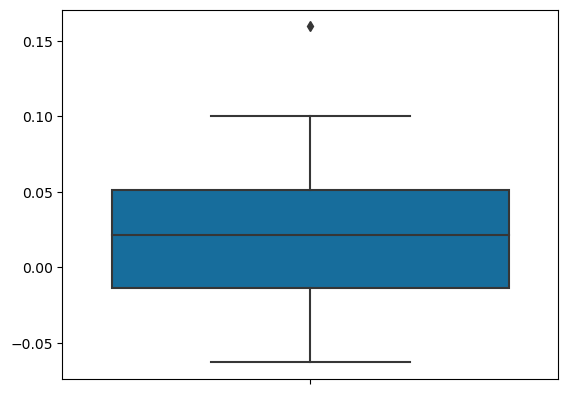

In [76]:
case_mean_diff = np.zeros(len(CX))
for cx in range(len(CX)):
    ddat = get_data_from_vtk_path(iou.fullfile(p2f, 'local', CX[cx], xnav('d'), 'OUTPUT', dname))
    idat = get_data_from_vtk_path(iou.fullfile(p2f, 'local', CX[cx], iname))

    case_mean_diff[cx] = np.mean(np.subtract(ddat, idat))


sns.boxplot(y=case_mean_diff)
print(sstat.ttest_1samp(a=case_mean_diff, popmean=0))

In [71]:
# 
#print('{:.2f} +/- {:.2f}'.format(np.nanmean(corrs),np.nanstd(corrs)))

np.sort(CX)

array(['10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2',
       '20', '21', '22', '23', '24', '25', '26', '5', '6', '7', '8', '9'],
      dtype='<U2')

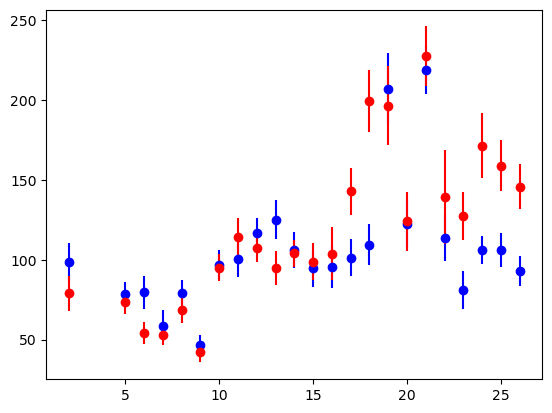

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

xx = True

if xx : 
    plt.errorbar(data=df_stats[df_stats['LGE_TYPE']=='dNAV'], x='CASE', y='MEAN_BP', yerr='SDEV_BP', fmt='ob')
    plt.errorbar(data=df_stats[df_stats['LGE_TYPE']=='iNAV'], x='CASE', y='MEAN_BP', yerr='SDEV_BP', fmt='or')
else :
    sns.scatterplot(data=df_stats, x='CASE', y='FIB_SCORE ', hue='LGE_TYPE')

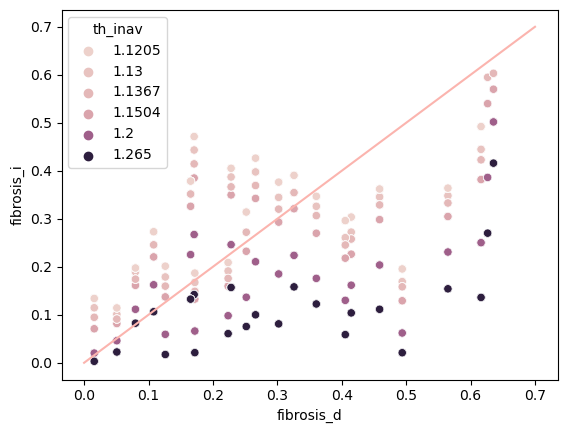

In [75]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

x=np.linspace(0, 0.7, 10)
y=x

sns.set_palette(palette='Pastel1')
sns.scatterplot(data=df, x='fibrosis_d', y='fibrosis_i', hue='th_inav', hue_order=[1.1205, 1.13, 1.1367, 1.1504, 1.2, 1.265])
plt.plot(x,y)


Text(0, 0.5, 'iNAV Fibrosis %')

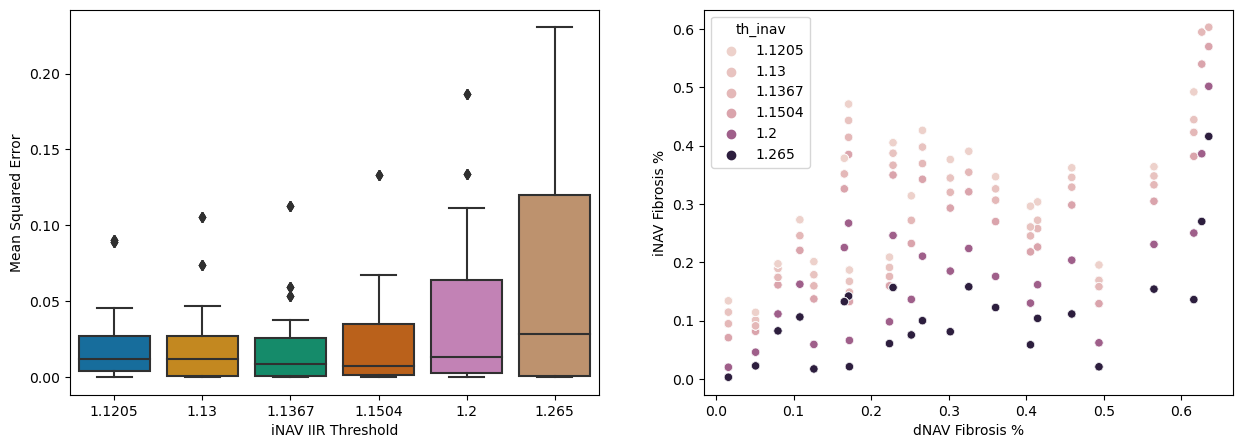

In [8]:

fig, ax = plt.subplots(1,2)
fig.set_figheight(5)
fig.set_figwidth(15)
sns.set_palette('Pastel1')

sns.boxplot(ax=ax[0], x=df['th_inav'], y=(df['fibrosis_d']-df['fibrosis_i'])
            ** 2, order=[1.1205, 1.13, 1.1367, 1.1504, 1.2, 1.265], 
            whis=1)
sns.scatterplot(ax=ax[1], data=df, x='fibrosis_d', y='fibrosis_i', hue='th_inav', hue_order=[1.1205, 1.13, 1.1367, 1.1504, 1.2, 1.265])
plt.plot()

ax[0].set_xlabel('iNAV IIR Threshold')
ax[0].set_ylabel('Mean Squared Error')
ax[1].set_xlabel('dNAV Fibrosis %')
ax[1].set_ylabel('iNAV Fibrosis %')

# sns.lmplot( data=df, x='fibrosis_d', y='fibrosis_i', col='th_inav', col_order=[1.1205, 1.13, 1.1367, 1.1504, 1.2, 1.265])

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


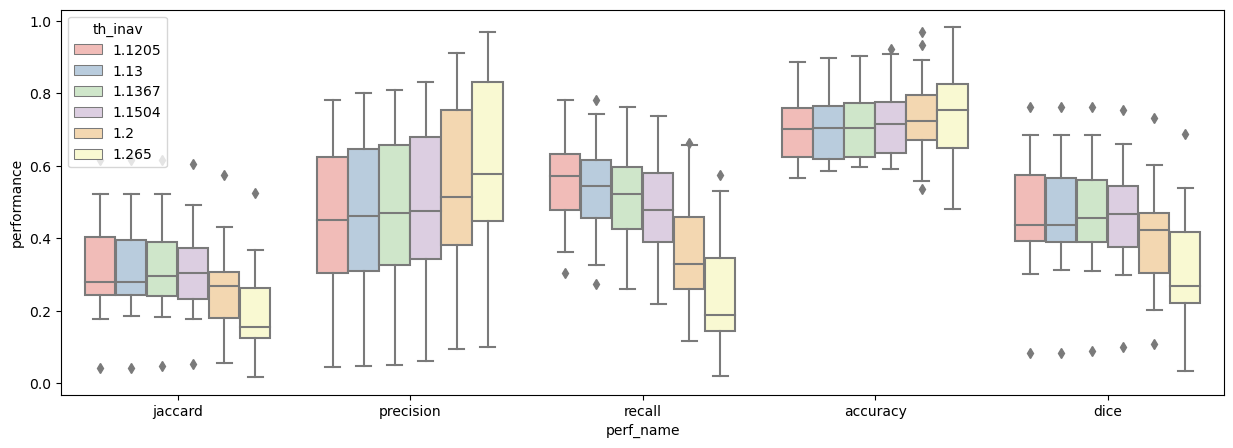

In [66]:

fig, ax = plt.subplots(1)
fig.set_figheight(5)
fig.set_figwidth(15)
sns.set_palette('Pastel1')
sns.boxplot(ax=ax, data=df, 
    x='perf_name', y='performance', hue='th_inav', whis=1,
    hue_order=[1.1205, 1.13, 1.1367, 1.1504, 1.2, 1.265])

plt.savefig(iou.fullfile(p2f, 'performance.eps'))


In [72]:
metric_name = 'accuracy'
th = [1.1205, 1.13, 1.1367, 1.1504, 1.2, 1.265]

print(metric_name)
for threshold in th :
    # threshold = 1.1205
    metric = df['performance']
    thresh = df['th_inav']

    metric = metric[df['perf_name']==metric_name]
    thresh = thresh[df['perf_name']==metric_name]

    metric = metric[thresh==threshold]

    print('{:.3f} (+/-{:.3f})'.format(np.mean(metric), np.std(metric)))


accuracy
0.702 (+/-0.086)
0.708 (+/-0.089)
0.714 (+/-0.092)
0.719 (+/-0.098)
0.733 (+/-0.118)
0.734 (+/-0.138)
